In [1]:
import pandas as pd
import missingno as msno

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import r2_score as r2

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
# import xgboost as xgb
# import lightgbm as lgb

In [140]:
train=pd.read_csv('train.csv')

In [141]:
train=train.drop(columns=['id'])

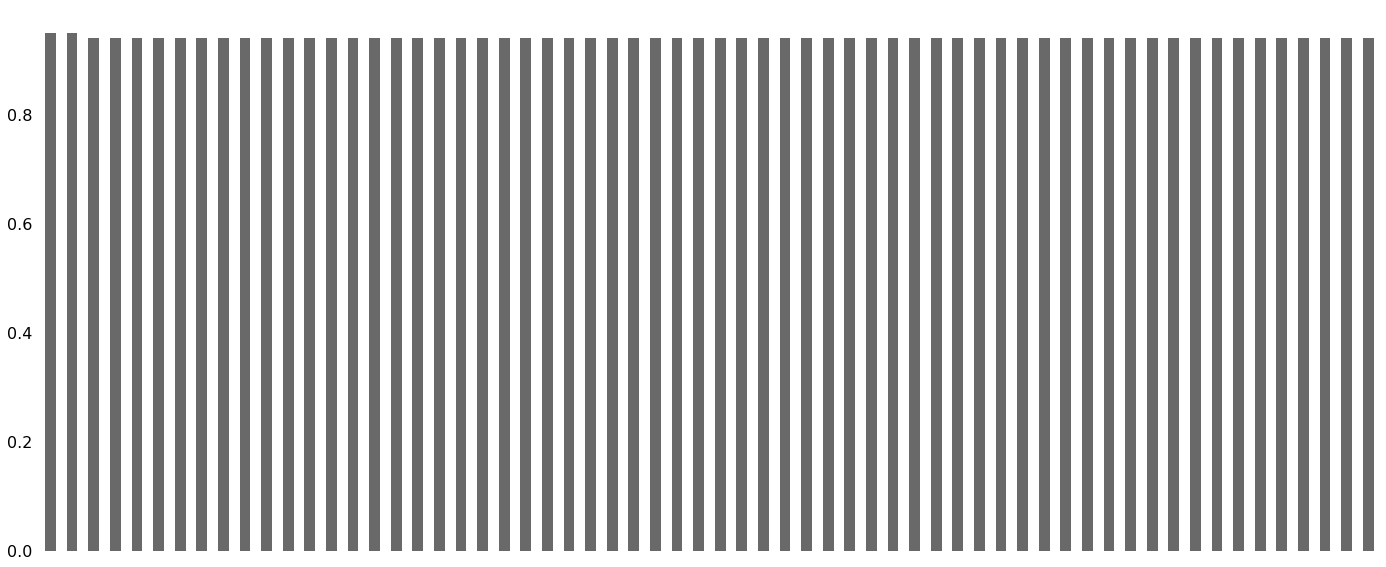

In [85]:
msno.bar(train.iloc[:,300:])

In [86]:
columns=train.columns

In [11]:
from impyute.imputation.cs import fast_knn
train1=fast_knn(train,k=3)

/home/aditya/.local/lib/python3.6/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [87]:
train1.isnull().sum()

span                0
target              0
feature_00          0
feature_01          0
feature_02          0
                   ..
feature_55_type5    0
feature_56_type5    0
feature_57_type5    0
feature_58_type5    0
feature_59_type5    0
Length: 362, dtype: int64

In [88]:
train1

,span,target,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_50_type5,feature_51_type5,feature_52_type5,feature_53_type5,feature_54_type5,feature_55_type5,feature_56_type5,feature_57_type5,feature_58_type5,feature_59_type5
0,17.0,1.025179,1.455438,0.767232,1.103207,0.355392,0.144054,1.249518,0.301203,-1.470791,...,-1.395021,-1.222626,-0.139682,0.813436,-0.340162,-0.032112,1.740059,1.000138,-1.667038,-0.128554
1,23.0,0.996383,0.132304,1.724691,1.517504,0.884100,-0.897716,-0.122241,1.523423,-1.152261,...,-1.269116,0.477700,1.590249,0.166410,0.648515,0.128202,-1.853485,-0.185335,-0.933777,0.420162
2,29.0,1.006573,0.542726,0.844240,-0.089719,0.204441,0.300044,0.564788,0.976612,0.513310,...,0.551799,1.066635,0.126409,-1.462542,1.177361,-1.142417,-0.506686,-0.741696,0.565734,-1.304175
3,16.0,0.968543,0.253863,0.799112,-1.399473,-1.979899,0.086771,-1.214792,-0.423301,1.159680,...,0.741387,-0.838532,-0.137156,0.075079,-1.395079,2.381879,-0.934174,0.775545,1.014650,1.978815
4,4.0,1.006677,-0.262913,0.091079,0.799063,0.998184,-0.804963,-1.468698,-0.041668,0.533569,...,1.197475,1.162764,-0.773935,-0.962255,0.161526,-0.722540,0.490989,-1.036087,1.361248,-0.548412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,3.0,1.009017,0.762784,0.747071,0.741833,0.815161,0.081883,0.820399,1.071809,-1.866543,...,0.469823,1.630600,-0.247333,-1.214602,0.273246,0.330685,-1.491482,-0.242872,-0.516406,0.146935
4173,27.0,0.986490,-1.355024,-0.170304,0.512556,0.866327,0.092968,-1.593613,0.331557,0.808736,...,1.423543,0.413655,-2.158102,0.927243,-0.385967,-0.099171,-0.021624,0.774438,1.478461,-0.157903
4174,10.0,1.011553,-0.326522,-0.034114,-0.618931,0.189492,-0.653332,-0.034114,-0.102916,1.875139,...,-0.089725,0.257907,0.063713,0.771563,1.134778,-1.504826,0.784149,0.105668,0.668472,-1.681639
4175,2.0,1.006285,0.791944,0.818057,1.488286,1.227157,-1.671365,0.878987,0.992142,-0.957615,...,1.499698,1.087443,0.391527,-0.736501,0.121103,-1.455741,-0.397053,-1.156636,1.441390,-1.695593


In [89]:
train1.columns=columns

In [142]:
test=pd.read_csv('test.csv')

In [143]:
X = train1.iloc[:,3:]  #independent columns
y = train1.iloc[:,2]#target column
X_test=   test.iloc[:,2:]

In [144]:
X['span']=train1.iloc[:,0]

/home/aditya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
X_test['span']=test.iloc[:,1]

In [146]:
X['span']=X.span.astype(float)

/home/aditya/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [147]:
X_test['span']=X_test.span.astype(float)

In [148]:
X

,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,...,feature_51_type5,feature_52_type5,feature_53_type5,feature_54_type5,feature_55_type5,feature_56_type5,feature_57_type5,feature_58_type5,feature_59_type5,span
0,0.767232,1.103207,0.355392,0.144054,1.249518,0.301203,-1.470791,-0.934316,0.886449,-1.113141,...,-1.222626,-0.139682,0.813436,-0.340162,-0.032112,1.740059,1.000138,-1.667038,-0.128554,17.0
1,1.724691,1.517504,0.884100,-0.897716,-0.122241,1.523423,-1.152261,-0.915475,-0.714206,0.043509,...,0.477700,1.590249,0.166410,0.648515,0.128202,-1.853485,-0.185335,-0.933777,0.420162,23.0
2,0.844240,-0.089719,0.204441,0.300044,0.564788,0.976612,0.513310,-1.008970,-0.251507,-0.222091,...,1.066635,0.126409,-1.462542,1.177361,-1.142417,-0.506686,-0.741696,0.565734,-1.304175,29.0
3,0.799112,-1.399473,-1.979899,0.086771,-1.214792,-0.423301,1.159680,0.632020,-0.599188,2.311739,...,-0.838532,-0.137156,0.075079,-1.395079,2.381879,-0.934174,0.775545,1.014650,1.978815,16.0
4,0.091079,0.799063,0.998184,-0.804963,-1.468698,-0.041668,0.533569,1.053495,0.290200,0.013643,...,1.162764,-0.773935,-0.962255,0.161526,-0.722540,0.490989,-1.036087,1.361248,-0.548412,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.747071,0.741833,0.815161,0.081883,0.820399,1.071809,-1.866543,-0.258568,0.301866,-0.792814,...,1.630600,-0.247333,-1.214602,0.273246,0.330685,-1.491482,-0.242872,-0.516406,0.146935,3.0
4173,-0.170304,0.512556,0.866327,0.092968,-1.593613,0.331557,0.808736,0.446738,0.273967,-0.639255,...,0.413655,-2.158102,0.927243,-0.385967,-0.099171,-0.021624,0.774438,1.478461,-0.157903,27.0
4174,-0.034114,-0.618931,0.189492,-0.653332,-0.034114,-0.102916,1.875139,-0.309322,-0.894138,0.757108,...,0.257907,0.063713,0.771563,1.134778,-1.504826,0.784149,0.105668,0.668472,-1.681639,10.0
4175,0.818057,1.488286,1.227157,-1.671365,0.878987,0.992142,-0.957615,-1.871564,-0.034962,-1.532097,...,1.087443,0.391527,-0.736501,0.121103,-1.455741,-0.397053,-1.156636,1.441390,-1.695593,2.0


In [149]:
y.dtypes

dtype('float64')

/home/aditya/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[2.35204707e-04 4.19057940e-04 2.12117063e-04 4.33056742e-04
 1.00048638e-03 3.17007223e-04 1.44717031e-04 3.03848394e-04
 5.53901158e-04 2.70781444e-04 3.20079560e-04 9.16425268e-02
 4.48145914e-04 2.59680260e-04 2.44854943e-01 1.97582696e-04
 5.51997376e-04 2.36826386e-04 6.91923759e-04 3.80831856e-04
 4.87323845e-04 4.45460641e-04 2.23386871e-04 1.79046477e-04
 2.16202714e-04 1.72398555e-04 2.86612105e-04 2.71398561e-04
 5.03870973e-02 2.06076806e-04 2.61067324e-04 2.34935505e-03
 2.16591586e-04 3.99183944e-04 3.80408346e-03 3.16806558e-04
 2.96123664e-04 4.37536751e-04 2.06852039e-04 3.54412222e-04
 3.03615618e-04 5.27127342e-04 1.89783796e-04 2.73558756e-04
 4.40280137e-04 4.63793707e-04 3.81109925e-04 1.64645929e-04
 2.82053081e-04 2.40390133e-04 4.94093153e-04 3.60117661e-04
 2.28030713e-04 4.60345490e-04 4.46935109e-04 3.77897385e-04
 3.30001342e-04 3.26674407e-04 2.29917058e-01 3.76945186e-04
 1.17227666e-04 3.31836595e-04 3.11156723e-04 2.43462938e-04
 4.09168009e-04 1.376863

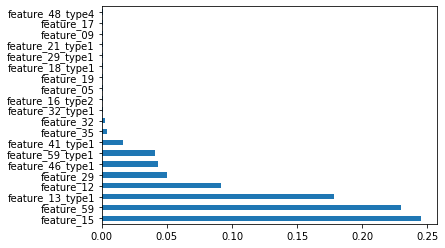

In [150]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [151]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(k=300).fit_transform(X, y)

/home/aditya/.local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:110: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


In [152]:
X_new.shape

(4177, 300)

In [153]:
y.shape

(4177,)

In [154]:
X=preprocessing.StandardScaler().fit(X_new).transform(X_new)
# X_test=preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [155]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

In [156]:
X_train

array([[-0.14615747,  0.5198531 , -1.68802885, ...,  0.6859515 ,
        -1.09325295, -0.86908154],
       [-0.59681215, -0.76376446, -0.2757123 , ...,  0.67745024,
        -0.29289139, -0.079059  ],
       [-0.76610905, -0.73471933, -0.87253231, ...,  0.33743545,
        -0.86562273,  0.03380137],
       ...,
       [ 2.14707651,  1.30203124,  1.10725608, ..., -1.06795051,
        -0.38116471,  1.5009861 ],
       [ 1.89792355, -1.18705312,  1.7881111 , ..., -0.74445559,
        -0.33070994, -1.09480227],
       [-0.80939182,  0.31689859, -0.96601353, ...,  1.24216545,
        -0.29143067, -0.19191936]])

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [158]:
from sklearn.ensemble import RandomForestRegressor

rnd = RandomForestRegressor(n_estimators=150, max_depth=60, min_samples_leaf=35)
rnd.fit(X_train, y_train)
yhat=rnd.predict(X_val)

r2_score(y_val,yhat)

0.7874505404317865

In [71]:
train[:,2]

TypeError: '(slice(None, None, None), 2)' is an invalid key

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rnd = RandomForestRegressor(n_estimators=150, max_depth=60, min_samples_leaf=35)
rnd.fit(X_train, y_train)
yhat=rnd.predict(x_test)

r2_score(y_test,yhat)